# ***Business Problem***

The Alumni Association wants to understand what drives first time attendance and the prospect of attendees making a major gift to the university. The association wants to use this information to increase engagement in existing and upcoming events.

# ***Business Objective***

To find out the correlations in events that are successful in attracting first time attendees and major gift prospects using a data driven approach.

## Import the Libraries and Upload Files

Our first step is to load the libraries.

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import re
import warnings
warnings.filterwarnings("ignore")
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor



## Load Data

Load the file into a Pandas dataframe.




In [ ]:
# Set maximum numbers of columns and rows to be displayed to 5.
#pd.set_option("display.max_rows",5)
#pd.set_option("display.width",5)

In [ ]:
#Reading the data file and collating all the sheets to form a single dataframe
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


# Data Cleaning

Preprocess the Data for Plots

In [ ]:
#before cleaning, we have 111 location descriptions,some of them are duplicate due to the extra spacing between letters/words
unique_location = df['Location Description'].unique()
print(unique_location)
print(len(unique_location))

['CP DMV-Eastern Shore' 'CP Online-Webinar' 'CP Northeast-NNJ'
 'CP Northeast-Philadelphia' 'CP West Coast-Dallas/Fort Worth'
 'CP West Coast-Los Angeles' 'CP West-San Diego' 'CP DMV-General'
 'CP Northeast-Boston' 'CP West Coast-General' 'CP DMV-Montgomery County'
 'CP DMV-Washington DC' 'CP West Coast-Denver' 'CP DMV-Greater CP'
 'CP Southeast-Dallas/Forth Worth' 'CP Northeast-New York'
 'CP DMV-Northern Virginia' 'CP DMV-Blue Ridge'
 'CP DMV- Montgomery County' 'CP West Coast-Tucson' 'CP DMV-Baltimore'
 'CP DMV-Southern MD' 'CP DMV-On Campus' 'CP West Coast-Bay Area'
 'CP DMV-Southern Maryland' 'CP West Coast-San Diego'
 'CP West Coast-Seattle' 'CP DMV-Northern VA' 'CP DMV-Annapolis'
 'CP Southeast-Jacksonville' 'CP DMV-DC' 'CP Southeast-Atlanta'
 'CP Northeast-Chicago' 'CP Northeast-Cincinnati' 'CP West-Seattle'
 'CP Southeast-South Florida' 'CP DMV-Howard County'
 "CP DMV-Prince George's County" 'CP DMV-MoCo'
 'CP DMV-Prince Georges County' 'CP Southeast-Dallas/Fort Worth'
 'CP We

In [ ]:
#after cleaning, we are left with 65 unique locations
df['Location Description'] = df['Location Description'].str.strip().str.replace("- ", "-")
unique_location = df['Location Description'].unique()
print(unique_location)
print(len(unique_location))

['CP DMV-Eastern Shore' 'CP Online-Webinar' 'CP Northeast-NNJ'
 'CP Northeast-Philadelphia' 'CP West Coast-Dallas/Fort Worth'
 'CP West Coast-Los Angeles' 'CP West-San Diego' 'CP DMV-General'
 'CP Northeast-Boston' 'CP West Coast-General' 'CP DMV-Montgomery County'
 'CP DMV-Washington DC' 'CP West Coast-Denver' 'CP DMV-Greater CP'
 'CP Southeast-Dallas/Forth Worth' 'CP Northeast-New York'
 'CP DMV-Northern Virginia' 'CP DMV-Blue Ridge' 'CP West Coast-Tucson'
 'CP DMV-Baltimore' 'CP DMV-Southern MD' 'CP DMV-On Campus'
 'CP West Coast-Bay Area' 'CP DMV-Southern Maryland'
 'CP West Coast-San Diego' 'CP West Coast-Seattle' 'CP DMV-Northern VA'
 'CP DMV-Annapolis' 'CP Southeast-Jacksonville' 'CP DMV-DC'
 'CP Southeast-Atlanta' 'CP Northeast-Chicago' 'CP Northeast-Cincinnati'
 'CP West-Seattle' 'CP Southeast-South Florida' 'CP DMV-Howard County'
 "CP DMV-Prince George's County" 'CP DMV-MoCo'
 'CP DMV-Prince Georges County' 'CP Southeast-Dallas/Fort Worth'
 'CP West-Bay Area' 'CP DMV-Western 

In [ ]:
#before cleaning, we have 88 group descriptions, some of them are duplicate due to spacing between letters/words
unique_group = df['Group Description'].unique()
print(unique_group)
print(len(unique_group))

['CP Social-General' 'CP ProDev-General' 'CP Social-General '
 'CP Social-Asian Pacific' 'CP Social-StuAlum' 'CP ProDev-Mid Career'
 'CP Athletics-General' 'CP Prodev-General' 'CP Cultural-General'
 'CP Social-RG' 'CP Affinity-Black Alumni' 'CP Affinity-Latino'
 'CP Service-General' 'CP Cultural-UMBA' 'CP ProDev-StuAlum'
 'CP Social-CIVICUS' 'CP Advocacy-General' 'CP Social- General'
 'CP Affinity-Lambda' 'CP Athletics-Students & Alumni'
 'CP Athletics-Genera' 'CP Affiniy-Black Alumni' 'CP General-General'
 'CP D&I-Alumnae' 'CP Career-Student' 'CP Athletics-UMBA'
 'CP Cultural-Jewish' 'CP Athletics-RG' 'CP ProDev- General'
 'CP ProDev-Students' 'CP Service-UMBA' 'CP Campaign-General'
 'CP Affinity-Band' 'CP Pro Dev-Alumnae' 'CP Stewardship-Membership'
 'CP Cultivation-StuAlum' 'CP ProDev-Alumnae' 'CP Social-Latino'
 'CP Pro Dev-General' 'CP DMV-On Campus' 'CP Social-Students'
 'CP Stewardship-General' 'CP Membership-Membership' 'CP Social-Terp Thon'
 'CP Cultivation-General' 'CP Advoca

In [ ]:
#after cleaning, we are left with 56 unique groups
df['Group Description'] = df['Group Description'].str.strip().str.replace("- ", "-")
unique_location = df['Group Description'].unique()
print(unique_location)
print(len(unique_location))

['CP Social-General' 'CP ProDev-General' 'CP Social-Asian Pacific'
 'CP Social-StuAlum' 'CP ProDev-Mid Career' 'CP Athletics-General'
 'CP Prodev-General' 'CP Cultural-General' 'CP Social-RG'
 'CP Affinity-Black Alumni' 'CP Affinity-Latino' 'CP Service-General'
 'CP Cultural-UMBA' 'CP ProDev-StuAlum' 'CP Social-CIVICUS'
 'CP Advocacy-General' 'CP Affinity-Lambda'
 'CP Athletics-Students & Alumni' 'CP Athletics-Genera'
 'CP Affiniy-Black Alumni' 'CP General-General' 'CP D&I-Alumnae'
 'CP Career-Student' 'CP Athletics-UMBA' 'CP Cultural-Jewish'
 'CP Athletics-RG' 'CP ProDev-Students' 'CP Service-UMBA'
 'CP Campaign-General' 'CP Affinity-Band' 'CP Pro Dev-Alumnae'
 'CP Stewardship-Membership' 'CP Cultivation-StuAlum' 'CP ProDev-Alumnae'
 'CP Social-Latino' 'CP Pro Dev-General' 'CP DMV-On Campus'
 'CP Social-Students' 'CP Stewardship-General' 'CP Membership-Membership'
 'CP Social-Terp Thon' 'CP Cultivation-General' 'CP ProDev-CIVICUS'
 'CP Cultural-Latino' 'CP Social-Young Alumni' 'CP Soc

In [ ]:
# Clean Activity code and description


def compare_data(Code, Description):
    list_Code = []
    list_Des = []
    for index in range(len(Code)):
        list_Code.append(re.sub("[^A-Za-z0-9]", "", str(Code[index]).lower()))
    
    for index in range(len(Description)):
        list_Des.append(re.sub("[^A-Za-z0-9]", "", str(Description[index]).lower()))
    
    # Zip Activity code and description
    list_Zip = list(zip(list_Code, list_Des))


    # Find the inconsistency between Activity code and description
    list_Incon = []
    for i in range(len(list_Zip)):
        for j in range(len(list_Zip)):
            if (list_Zip[i][0] == list_Zip[j][0]) and \
                (list_Zip[i][1] != list_Zip[j][1]) and\
                (list_Zip[i] not in list_Incon):
                list_Incon.append(list_Zip[i])

         
    # Check the unique number of Activity code and description
    set_Code = set(list_Code)
    set_Des = set(list_Des)


    print("Number of Unique Code", len(set_Code))
    print("Number of Unique Description", len(set_Des))
    print("Number of inconsistent element", len(list_Incon))
    
    return list_Zip, list_Incon

In [ ]:
compare_Act=compare_data(df["Activity Code"], 
                         df["Activity Description"])

Number of Unique Code 341
Number of Unique Description 346
Number of inconsistent element 10


In [ ]:
list_Act_Zip = compare_Act[0]
list_Act_Incon = compare_Act[1]

In [ ]:
compare_Loc=compare_data(df["Location Code"], 
                         df["Location Description"])

Number of Unique Code 45
Number of Unique Description 63
Number of inconsistent element 31


In [ ]:
list_Loc_Zip = compare_Loc[0]
list_Loc_Incon = compare_Loc[1]

In [ ]:
compare_Gr=compare_data(df["Group Code"], 
                        df["Group Description"])

Number of Unique Code 49
Number of Unique Description 53
Number of inconsistent element 19


In [ ]:
list_Gr_Zip = compare_Gr[0]
list_Gr_Incon = compare_Gr[1]

In [ ]:
# Def the function to replace duplicate data for the same code
def replace_data(data, Code, Description, Column):
    # Find Unique Code
    list_Unique_Code = Code.unique()
    
    # Replace Activity Description with latest data for the same Code
    for UniqueCode in list_Unique_Code:
        data.loc[Code == UniqueCode, Column]=\
        data.loc[data[(Code == UniqueCode) & (data["Event Date"] == \
           (data[Code == UniqueCode]["Event Date"].max()))]\
           [[Column]].index.values[0], Column]
    
    return data

In [ ]:
# Assign Final Data
df = replace_data(df, df["Activity Code"], 
             df["Activity Description"], "Activity Description")
df = replace_data(df, df["Location Code"], 
             df["Location Description"], "Location Description")
df = replace_data(df, df["Group Code"], 
             df["Group Description"], "Group Description")

## Exploratory Data Analysis & Plot 
 Let's plot a basis graph and examine

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Participated,622.0,44.803859,93.165049,1.0,10.000000,20.000000,44.750000,1657.000000
Average Age,622.0,40.117363,9.741459,19.0,33.000000,40.000000,46.000000,75.000000
First Time Attendees,622.0,13.456592,41.103936,0.0,1.000000,4.000000,11.000000,702.000000
Percentage First Time Attendees,622.0,0.276282,0.242273,0.0,0.068523,0.237327,0.444444,1.000000
Major Prospects,622.0,5.966238,14.123466,0.0,0.000000,1.000000,5.000000,131.000000
Percentage Major Prospect,622.0,0.102214,0.131444,0.0,0.000000,0.058824,0.166667,0.818182


In [ ]:
df.isnull().values.any()
# False - confirms nonexistence of NaN values under the DataFrame column

False

#### Distribution Plot of Various Numerical Columns

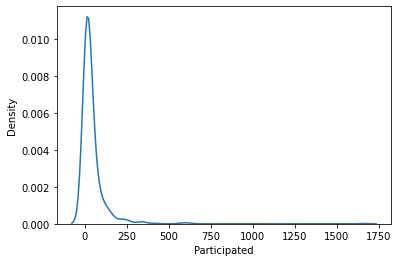

In [ ]:
#Distribution Plot of No.of Participated 
sns.distplot(df['Participated'],hist=False)
plt.show()

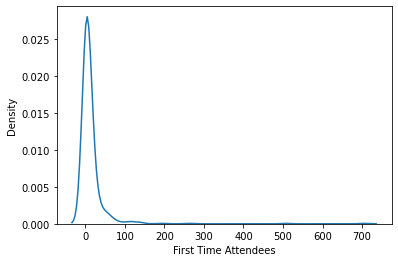

In [ ]:
#Distribution Plot of No.of First Time attendees
sns.distplot(df['First Time Attendees'],hist=False)
plt.show()

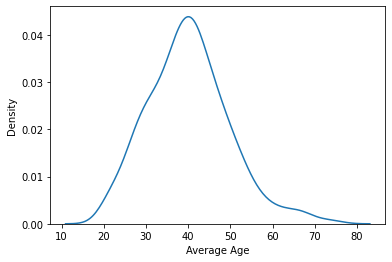

In [ ]:
#Distribution plot of Avearge Age of Participants
sns.distplot(df['Average Age'],hist=False)
plt.show()

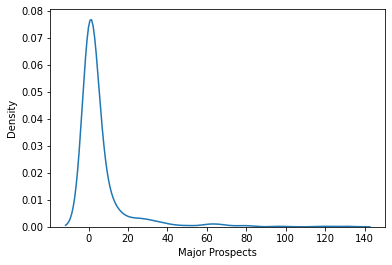

In [ ]:
#Distribution Plot of No.of Major Prospects
sns.distplot(df['Major Prospects'],hist=False)
plt.show()

#### Univariate analysis




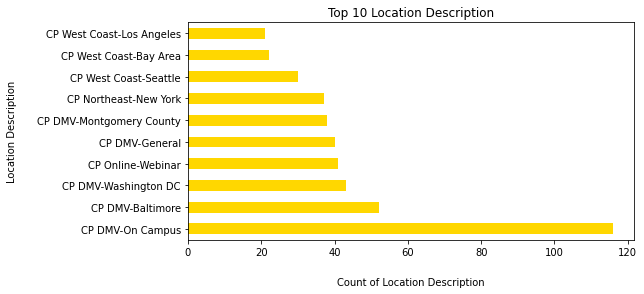

In [ ]:
# the top ten Location Description
df['Location Description'].value_counts()[:10].plot(kind='barh', figsize=(8, 4), color='gold')
plt.xlabel("Count of Location Description", labelpad=20)
plt.ylabel("Location Description", labelpad=20)
plt.title("Top 10 Location Description")
plt.show()

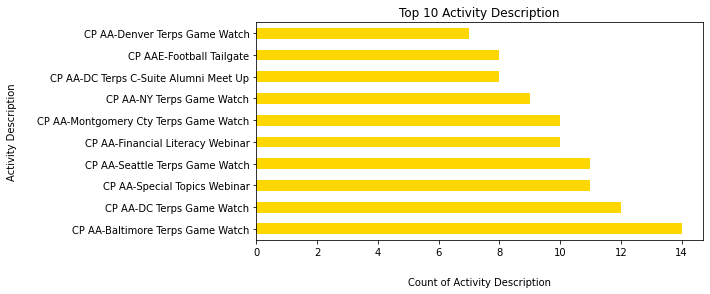

In [ ]:
# the top ten Activities Description
df['Activity Description'].value_counts()[:10].plot(kind='barh', figsize=(8, 4), color='gold')
plt.xlabel("Count of Activity Description", labelpad=20)
plt.ylabel("Activity Description", labelpad=20)
plt.title("Top 10 Activity Description")
plt.show()

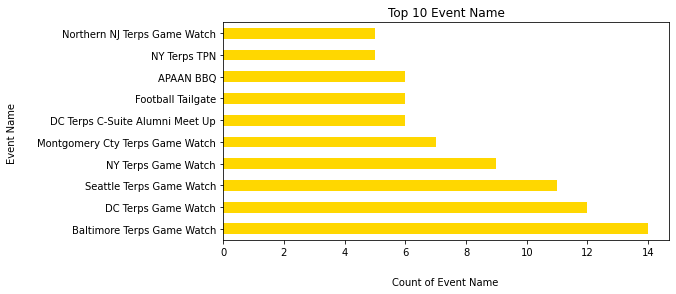

In [ ]:
# the top ten Event Name 
df['Event Name'].value_counts()[:10].plot(kind='barh', figsize=(8, 4), color='gold')
plt.xlabel("Count of Event Name ", labelpad=20)
plt.ylabel("Event Name ", labelpad=20)
plt.title("Top 10 Event Name")
plt.show()

##### Plotting Via Location







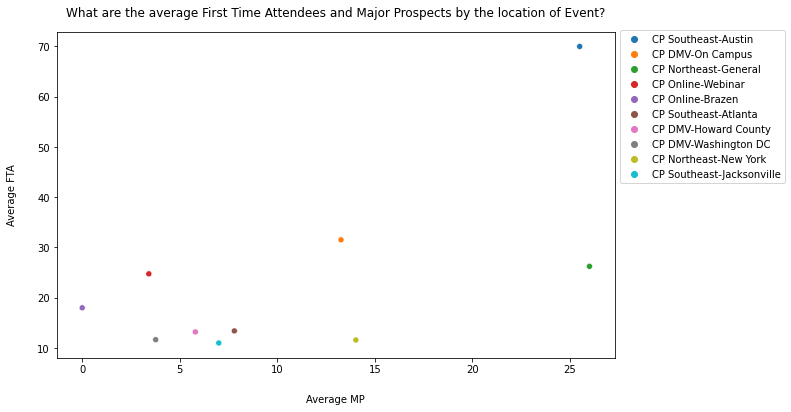

In [ ]:
#Average age of First Time Attendees and Major Prospects by the location of an Event

g = df.groupby('Location Description')[['First Time Attendees', 'Major Prospects']].mean().sort_values(by= 'First Time Attendees', ascending=False).head(10)


#g = df.groupby(['country', 'month'])['revenue', 'profit', 'ebit'].sum()
j = df.groupby(['Location Description']).size().to_frame('Count of Events')
x= pd.merge(g, j, left_index=True, right_index=True).reset_index()

plt.figure(figsize=(10,6))

sns.scatterplot(x="Major Prospects", y="First Time Attendees", hue="Location Description", data=x, legend='full')
plt.title("What are the average First Time Attendees and Major Prospects by the location of Event?", pad=15)

plt.xlabel("Average MP", labelpad=20)
plt.ylabel("Average FTA", labelpad=20)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

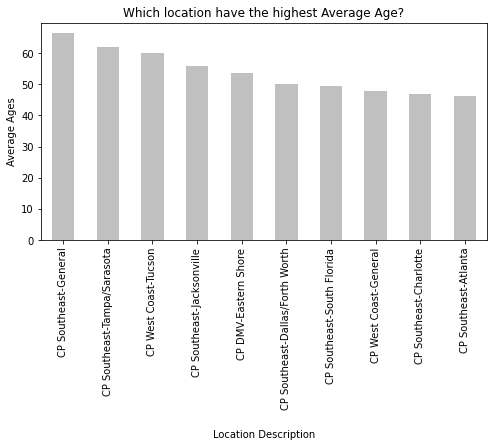

In [ ]:
# Location and their Average Ages
x = df.groupby('Location Description')['Average Age'].mean().sort_values(ascending=False).head(10)

x.plot(kind='bar', figsize=(8, 4), x='Location Description', y='Average Age', color='silver', legend=None, title='Which location have the highest Average Age?')
plt.xlabel("Location Description", labelpad=20)
plt.ylabel("Average Ages")
plt.show()

In [ ]:
#retest
locationTable = df.groupby('Location Description').sum().reset_index()
locationTable

topLocation = locationTable.nlargest(10,['Participated'])
topLocation


,Location Description,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
9,CP DMV-On Campus,10706,4973,3657,38.126743,1539,15.294312
25,CP Online-Webinar,2931,1652,1015,10.833096,140,1.578550
22,CP Northeast-New York,2694,1329,429,7.597073,519,5.190523
12,CP DMV-Washington DC,1826,1477,501,11.896704,162,2.715131
1,CP DMV-Baltimore,1627,1893,369,12.874365,179,2.619848
4,CP DMV-General,1142,1440,409,13.629845,125,5.485426
7,CP DMV-Montgomery County,1116,1580,315,10.244530,136,3.251389
0,CP DMV-Annapolis,799,610,155,4.629978,101,1.564644
40,CP West Coast-Los Angeles,632,817,206,7.012223,97,2.458312
36,CP West Coast-Bay Area,460,774,119,5.488769,103,2.211081


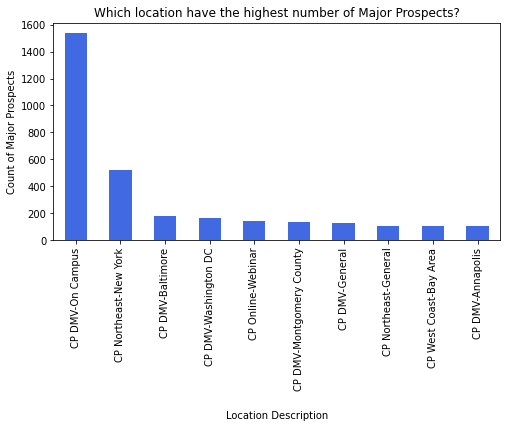

In [ ]:
# Location and the number of Major Prospects?
x = df.groupby('Location Description')['Major Prospects'].sum().sort_values(ascending=False).head(10)
x.plot(kind='bar', figsize=(8, 4), x='Location Description', y='Major Prospects', color='royalblue', title='Which location have the highest number of Major Prospects?')
plt.xlabel("Location Description", labelpad=20)
plt.ylabel("Count of Major Prospects")
plt.show()

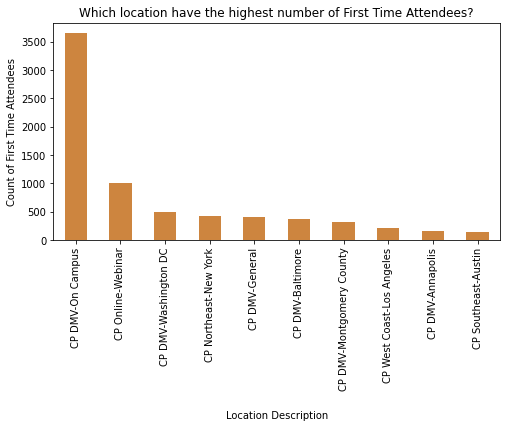

In [ ]:
#Location having and the number of First Time Attendees

x = df.groupby('Location Description')['First Time Attendees'].sum().sort_values(ascending=False).head(10)
x.plot(kind='bar',  figsize=(8, 4), x='Location Description', y='First Time Attendees', color='peru', title='Which location have the highest number of First Time Attendees?')
plt.xlabel("Location Description", labelpad=20)
plt.ylabel("Count of First Time Attendees")
plt.show()

##### Plotting Via Activity







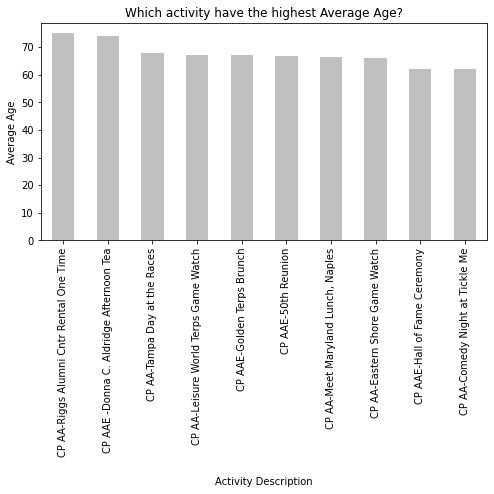

In [ ]:
# Activity and the Average Age of the participants
x = df.groupby('Activity Description')['Average Age'].mean().sort_values(ascending=False).head(10)
x.plot(kind='bar', figsize=(8, 4), x='Activity Description', y='Average Age', color='silver', legend=None, title='Which activity have the highest Average Age?')
plt.xlabel("Activity Description", labelpad=20)
plt.ylabel("Average Age")
plt.show()

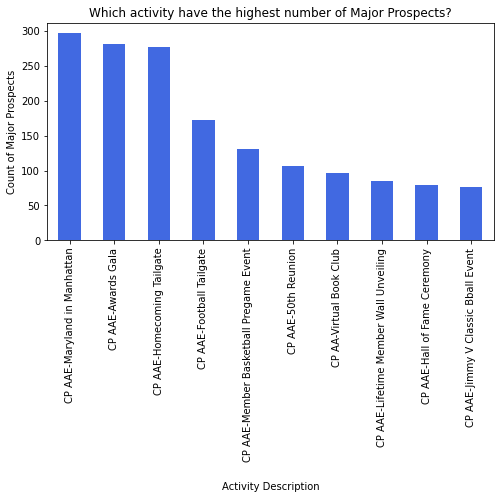

In [ ]:
#Activity and the number of Major Prospects
x = df.groupby('Activity Description')['Major Prospects'].sum().sort_values(ascending=False).head(10)
x.plot(kind='bar', figsize=(8, 4), x='Activity Description', y='Major Prospects', color='royalblue', title='Which activity have the highest number of Major Prospects?')
plt.xlabel("Activity Description", labelpad=20)
plt.ylabel("Count of Major Prospects")
plt.show()

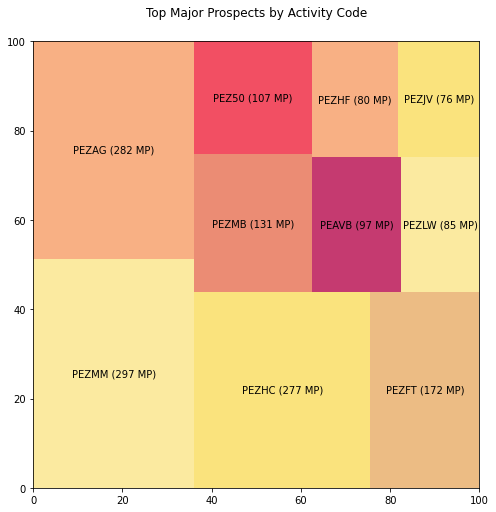

In [ ]:
#Activity and Major Prospects(Tree Map)

x = df.groupby('Activity Code')['Major Prospects'].sum().sort_values(ascending=False).head(10).to_dict()


# create the labels using a list comprehesion
labels = ["{} ({} MP)".format(class_, obs) for class_, obs in x.items()]

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, aspect="equal")

ax = squarify.plot(sizes = x.values(), label = labels, color = colors, alpha = 0.8)
plt.title("Top Major Prospects by Activity Code", pad=25)
plt.show()

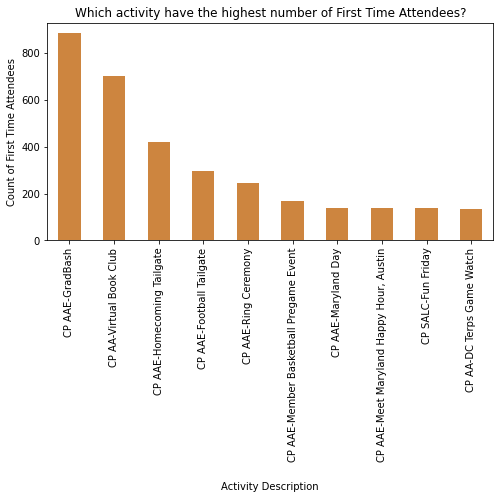

In [ ]:
#Activity and number of First Time Attendees
x = df.groupby('Activity Description')['First Time Attendees'].sum().sort_values(ascending=False).head(10)
x.plot(kind='bar',  figsize=(8, 4), x='Activity Description', y='First Time Attendees', color='peru', title='Which activity have the highest number of First Time Attendees?')
plt.xlabel("Activity Description", labelpad=20)
plt.ylabel("Count of First Time Attendees")
plt.show()

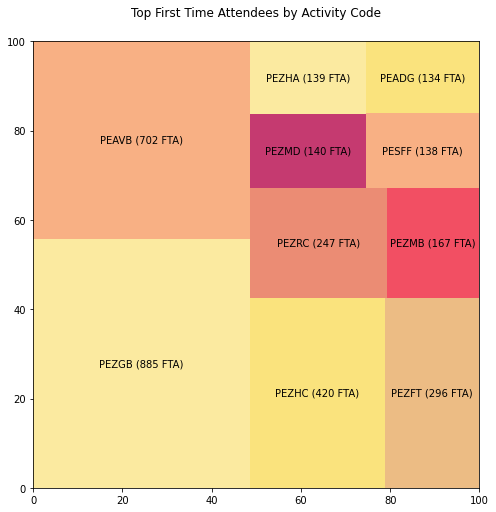

In [ ]:
# Activity and number of First Time Attendees(Tree Map)
x = df.groupby('Activity Code')['First Time Attendees'].sum().sort_values(ascending=False).head(10).to_dict()


# create the labels using a list comprehesion
labels = ["{} ({} FTA)".format(class_, obs) for class_, obs in x.items()]

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, aspect="equal")

ax = squarify.plot(sizes = x.values(), label = labels, color = colors, alpha = 0.8)
plt.title("Top First Time Attendees by Activity Code", pad=25)
plt.show()

##### Distribution of Top Ten Event with highest First Time Attendees 

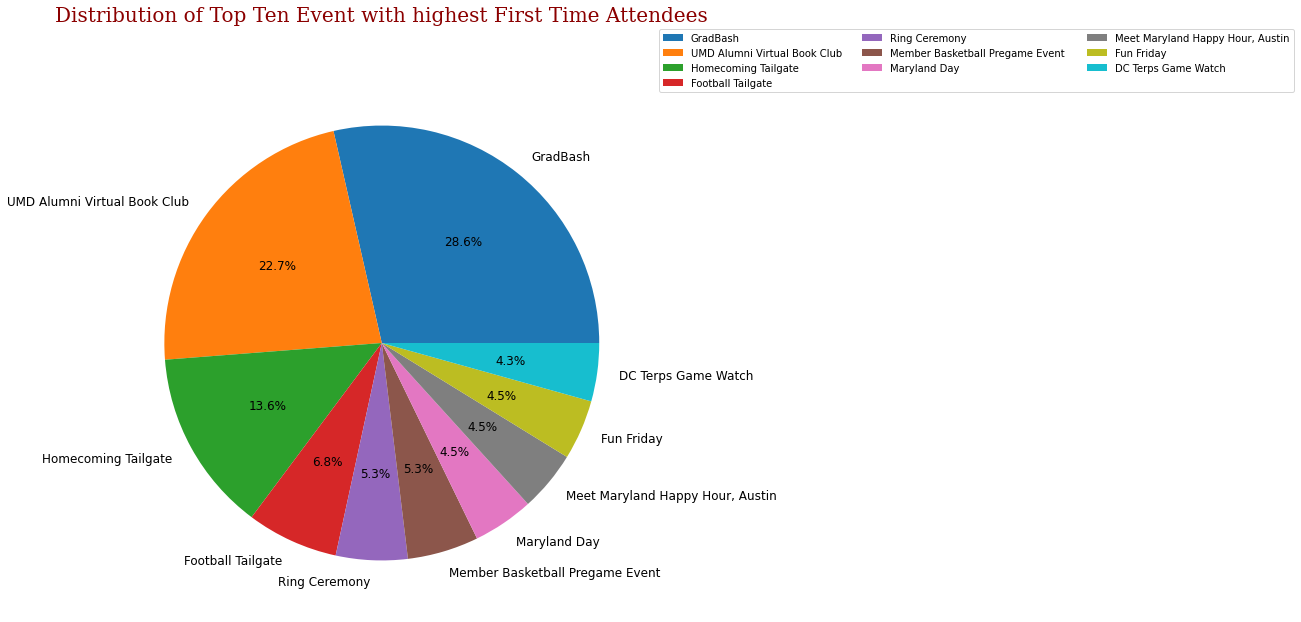

In [ ]:
#x = df["Event Name"].value_counts().head(10).to_dict()
x = df.groupby('Event Name')['First Time Attendees'].sum().sort_values(ascending=False).head(10).to_dict()

fig = plt.figure(figsize = (18, 10))
ax = fig.add_subplot()

ax.pie(x.values(), # pass the values from our dictionary
       labels = x.keys(), # pass the labels from our dictonary
       autopct = '%1.1f%%', # specify the format to be plotted
       textprops = {'fontsize': 12, 'color' : "Black"} # change the font size and the color of the numbers inside the pie
      )

font1 = {'family':'serif','color':'darkred','size':20}
plt.title("Distribution of Top Ten Event with highest First Time Attendees", pad=50, fontdict = font1)
plt.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc='center left')
plt.show()

##### Plotting Via Group


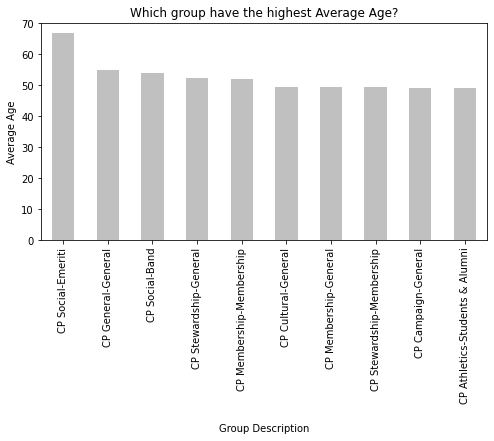

In [ ]:
# Group and their Average Age?
x = df.groupby('Group Description')['Average Age'].mean().sort_values(ascending=False).head(10)
x.plot(kind='bar', figsize=(8, 4), x='Group Description', y='Average Age', color='silver', legend=None, title='Which group have the highest Average Age?')
plt.xlabel("Group Description", labelpad=20)
plt.ylabel("Average Age")
plt.show()

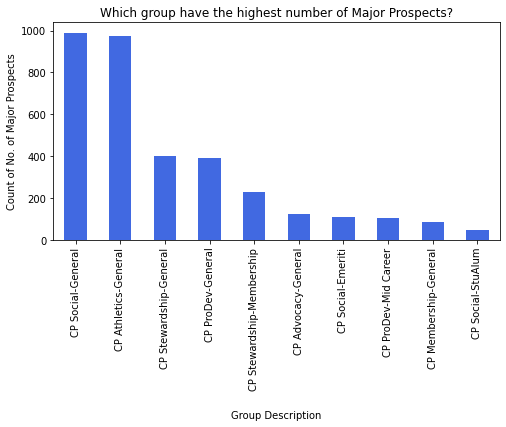

In [ ]:
# Group and the number of Major Prospects?
x = df.groupby('Group Description')['Major Prospects'].sum().sort_values(ascending=False).head(10)
x.plot(kind='bar', figsize=(8, 4), x='Group Description', y='Major Prospects', color='royalblue', title='Which group have the highest number of Major Prospects?')
plt.xlabel("Group Description", labelpad=20)
plt.ylabel("Count of No. of Major Prospects")
plt.show()

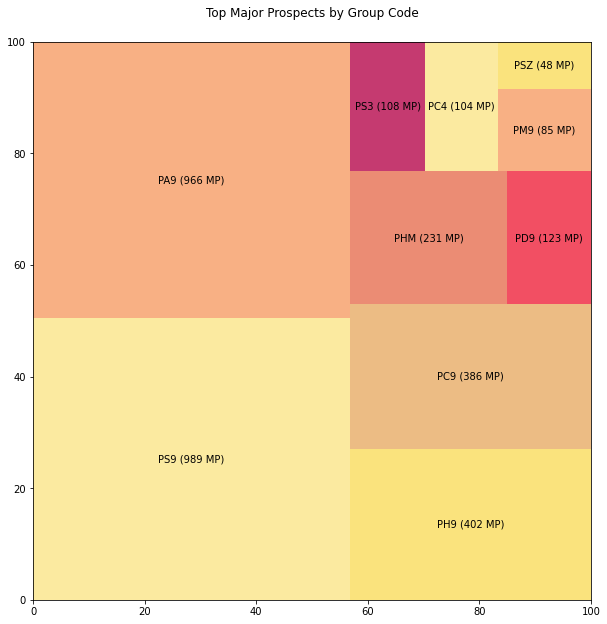

In [ ]:
# Group code and the number of Major Prospects(Tree Map)
x = df.groupby('Group Code')['Major Prospects'].sum().sort_values(ascending=False).head(10).to_dict()


# create the labels using a list comprehesion
labels = ["{} ({} MP)".format(class_, obs) for class_, obs in x.items()]

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, aspect="equal")

ax = squarify.plot(sizes = x.values(), label = labels, color = colors, alpha = 0.8)
plt.title("Top Major Prospects by Group Code", pad=25)
plt.show()

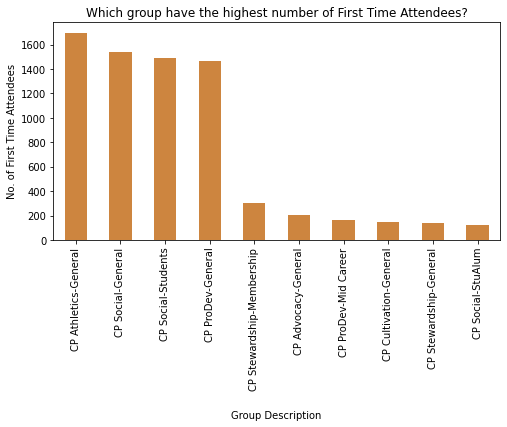

In [ ]:
# Group and the number of First Time Attendees?
x = df.groupby('Group Description')['First Time Attendees'].sum().sort_values(ascending=False).head(10)
x.plot(kind='bar', figsize=(8, 4), x='Group Description', y='First Time Attendees', color='peru', title='Which group have the highest number of First Time Attendees?')
plt.xlabel("Group Description", labelpad=20)
plt.ylabel("No. of First Time Attendees")
plt.show()

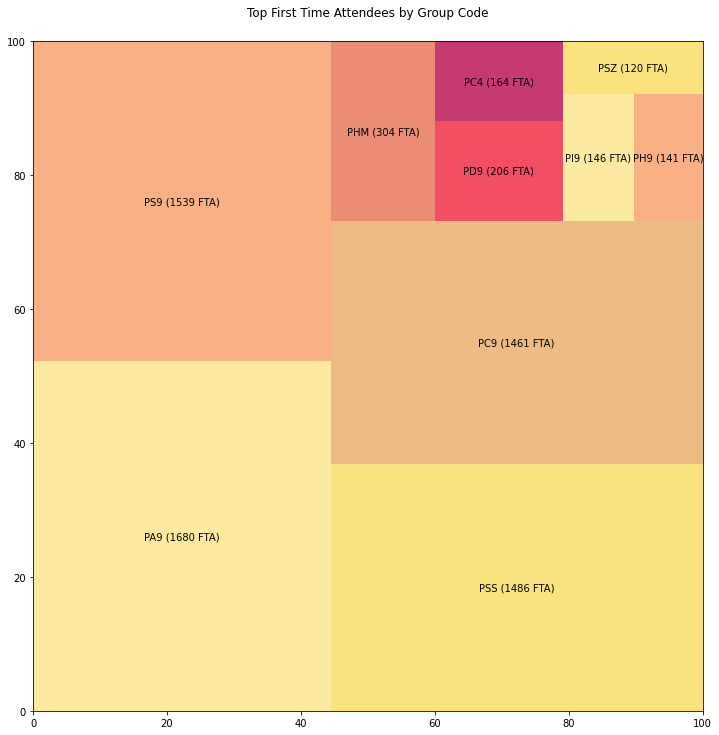

In [ ]:
#Group code and the No. of First Time Attendees?
x = df.groupby('Group Code')['First Time Attendees'].sum().sort_values(ascending=False).head(10).to_dict()

# create the labels using a list comprehesion
labels = ["{} ({} FTA)".format(class_, obs) for class_, obs in x.items()]

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, aspect="equal")

ax = squarify.plot(sizes = x.values(), label = labels, color = colors, alpha = 0.8)
plt.title("Top First Time Attendees by Group Code", pad=25)
plt.show()

### Correlation Heat Map

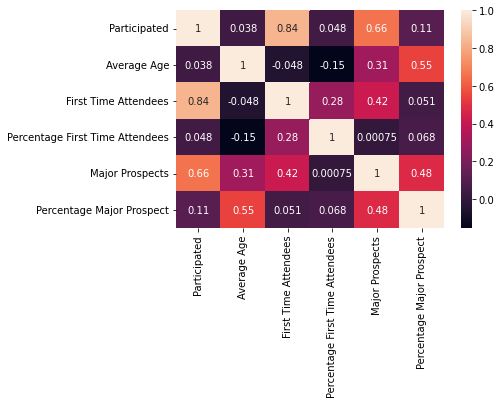

In [ ]:
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

##### Plotting Via Time Trend


In [ ]:
df["Event Day"] = df["Event Date"].dt.day_name().str.slice(stop=3)
df["Event Month"] = df["Event Date"].dt.month
df["Event Year"] = df["Event Date"].dt.year

#convert month int to month name
df['Event Month'] = pd.to_datetime(df['Event Month'], format='%m').dt.month_name().str.slice(stop=3)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Day,Event Month,Event Year
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476,Sat,Jul,2019
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000,Wed,Jul,2019
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429,Thu,Jul,2019
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000,Thu,Jul,2019
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000,Sun,Jul,2019


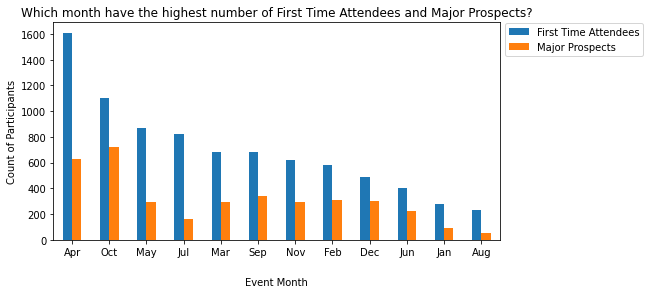

In [ ]:
# Month and the number of First Time Attendees and Major Prospects
x = df.groupby('Event Month')[['First Time Attendees', 'Major Prospects']].sum().sort_values(by='First Time Attendees', ascending=False)
x
x.plot.bar(figsize=(8, 4), rot=0, title = 'Which month have the highest number of First Time Attendees and Major Prospects?')
plt.xlabel("Event Month", labelpad=20)
plt.ylabel("Count of Participants")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

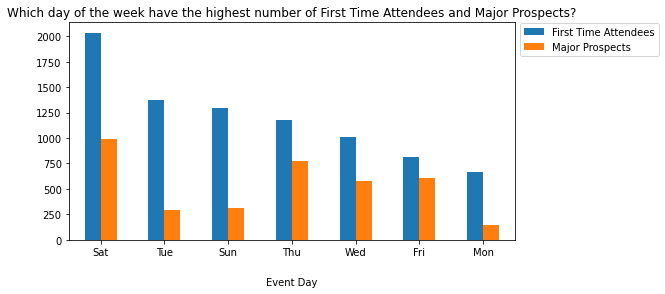

In [ ]:
# Day of the week have and the number of First Time Attendees and Major Prospects?
x = df.groupby('Event Day')[['First Time Attendees', 'Major Prospects']].sum().sort_values(by='First Time Attendees', ascending=False)
x
x.plot.bar(figsize=(8, 4), rot=0, title = 'Which day of the week have the highest number of First Time Attendees and Major Prospects?')
plt.xlabel("Event Day", labelpad=20)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

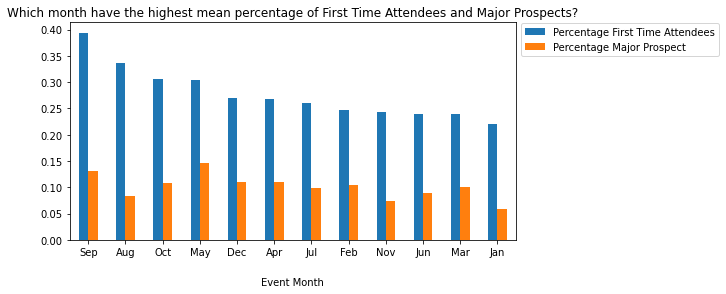

In [ ]:
# Month and the highest mean percentage of First Time Attendees and Major Prospects
x = df.groupby('Event Month')[['Percentage First Time Attendees', 'Percentage Major Prospect']].mean()\
.sort_values(by='Percentage First Time Attendees', ascending=False)
x
x.plot.bar(figsize=(8, 4), rot=0, title = 'Which month have the highest mean percentage of First Time Attendees and Major Prospects?')
plt.xlabel("Event Month", labelpad=20)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

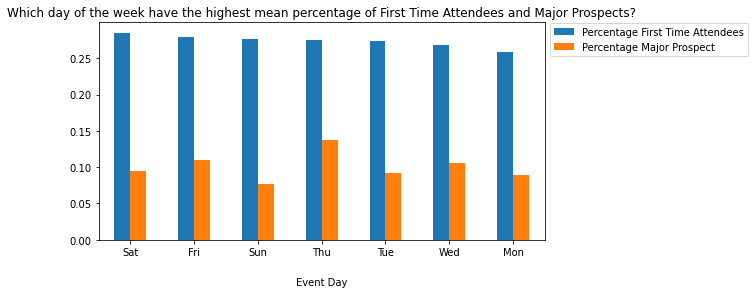

In [ ]:
# Day of the week and the highest mean percentage of First Time Attendees and Major Prospects
x = df.groupby('Event Day')[['Percentage First Time Attendees', 'Percentage Major Prospect']].mean()\
.sort_values(by='Percentage First Time Attendees', ascending=False)
x
x.plot.bar(figsize=(8, 4), rot=0, title = 'Which day of the week have the highest mean percentage of First Time Attendees and Major Prospects?')
plt.xlabel("Event Day", labelpad=20)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

## Time Series Plots

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Event Month'] = pd.Categorical(df['Event Month'], categories=months, ordered=True)

dfp = pd.pivot_table(data=df, index='Event Month', columns='Event Year', values='Major Prospects', aggfunc='sum')
dfp

Event Year,2013,2014,2015,2016,2017,2018,2019
Event Month,,,,,,,
Jan,NaN,NaN,16.0,0.0,0.0,34.0,38.0
Feb,NaN,7.0,100.0,26.0,34.0,96.0,46.0
Mar,NaN,5.0,65.0,100.0,38.0,52.0,37.0
Apr,NaN,95.0,149.0,125.0,30.0,105.0,122.0
May,NaN,50.0,67.0,84.0,23.0,51.0,18.0
Jun,NaN,25.0,85.0,47.0,14.0,20.0,30.0
Jul,NaN,NaN,NaN,5.0,33.0,113.0,14.0
Aug,NaN,4.0,1.0,0.0,NaN,24.0,24.0
Sep,23.0,31.0,21.0,119.0,70.0,69.0,6.0


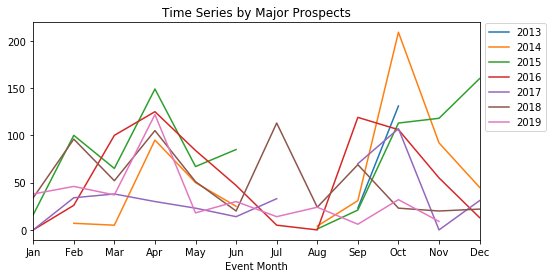

In [ ]:
# Time Series of Major Prospects across Months

ax = dfp.plot(figsize=(8, 4), title='Time Series by Major Prospects')
ax.set_xticks(range(12))  # set ticks for all months
ax.set_xticklabels(dfp.index)  # label all the ticks
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Event Month'] = pd.Categorical(df['Event Month'], categories=months, ordered=True)

dfp = pd.pivot_table(data=df, index='Event Month', columns='Event Year', values='First Time Attendees', aggfunc='sum')
dfp

Event Year,2013,2014,2015,2016,2017,2018,2019
Event Month,,,,,,,
Jan,NaN,NaN,41.0,57.0,2.0,123.0,55.0
Feb,NaN,0.0,324.0,28.0,98.0,75.0,55.0
Mar,NaN,0.0,246.0,138.0,76.0,185.0,38.0
Apr,NaN,0.0,167.0,297.0,15.0,1026.0,105.0
May,NaN,0.0,204.0,261.0,329.0,71.0,3.0
Jun,NaN,0.0,52.0,177.0,11.0,101.0,58.0
Jul,NaN,NaN,NaN,1.0,62.0,749.0,12.0
Aug,NaN,111.0,17.0,11.0,NaN,72.0,23.0
Sep,0.0,89.0,73.0,68.0,179.0,255.0,17.0


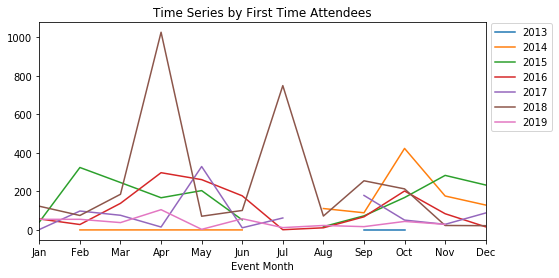

In [ ]:
# # Time Series of First Time attendees across Months
ax = dfp.plot(figsize=(8, 4), title='Time Series by First Time Attendees')
ax.set_xticks(range(12))  # set ticks for all months
ax.set_xticklabels(dfp.index)  # label all the ticks
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

## Regression

### Linear Regression

We try to predict the percentage of new attendees.Trying to predict as to how many people would attend the event based on certain attributes.

Our objective is to predict how many % of people would attend any event based on attributes.

In [ ]:
#reading the data
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
print(df.shape)

(622, 14)


In [ ]:
# finding the no of unique values per column/attribute
lis=[]
for i in df.columns:
    
    x=len(pd.unique(df[i]))
    lis.append(x)

y=df.columns.values

pd.DataFrame((list(zip(y,lis))),columns=['Attribute','No of Unique Values'])


,Attribute,No of Unique Values
0,Event Name,428
1,Activity Code,341
2,Activity Description,346
3,Location Code,45
4,Location Description,111
5,Group Code,49
6,Group Description,88
7,Event Date,444
8,Participated,138
9,Average Age,55


### In our project we have 3 Regression Models and Named them as Model 1,Model2 and Model 3

For Model 1: We have considered and done one hot encoding for Location Code, Group Code and Event Year. (We chose these categorical variables as the number of unique values was < 50) along with other numerical values as independent variables

For Model 2: We have considered and done one hot encoding for Event Year alone as part of along with other numerical values as independent variables

For Model 3: We have considered numerical columns alone as independent variables


##### Linear Regression Model 1

In [ ]:
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
#target column description
df['Percentage First Time Attendees'].describe()

count    622.000000
mean       0.276282
std        0.242273
min        0.000000
25%        0.068523
50%        0.237327
75%        0.444444
max        1.000000
Name: Percentage First Time Attendees, dtype: float64

In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 14 columns):
Event Name                         622 non-null object
Activity Code                      622 non-null object
Activity Description               622 non-null object
Location Code                      622 non-null object
Location Description               622 non-null object
Group Code                         622 non-null object
Group Description                  622 non-null object
Event Date                         622 non-null datetime64[ns]
Participated                       622 non-null int64
Average Age                        622 non-null int64
First Time Attendees               622 non-null int64
Percentage First Time Attendees    622 non-null float64
Major Prospects                    622 non-null int64
Percentage Major Prospect          622 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 68.2+ KB


In [ ]:
df['Event Date'] = pd.to_datetime(df['Event Date'],format='%Y%m%d')
df['Event Date']

0     2019-07-06
1     2019-07-10
2     2019-07-11
3     2019-07-11
4     2019-07-14
         ...    
617   2014-05-13
618   2014-05-21
619   2014-05-21
620   2014-06-12
621   2014-06-24
Name: Event Date, Length: 622, dtype: datetime64[ns]

In [ ]:
#extarcting just the year from the event dates
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
# getting dummy variables for Location Code,Group Code and Event Date(in year)

"""Why I chose these 3 columns?
Regression is done between numerical columns only.In order to consider categorical columns we have to assign 
dummy variables to them so that we can consider them like numerical variable.In any sort of ML techniques 
we try to include maximum no of attributes as possible to avoid any data loss.
But assigning dummy variables to columns which have many unique values would be foolish.
But LC,GC and ED have >50 unique values hence used them only."""

df_reg=pd.get_dummies(df,columns=['Location Code','Group Code','Event Date'])

In [ ]:
#Removing other categorical columns that we wont be using
df_reg.drop(['Event Name','Activity Code','Activity Description','Location Description','Group Description'],axis=1,inplace=True)

In [ ]:
df_reg.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Location Code_P9NA,Location Code_PDAN,Location Code_PDBA,Location Code_PDBR,...,Group Code_PUU,Group Code_PUZ,Group Code_PVW,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#For any regression we take 2 datasets one that has our dependent variable i.e what we want to predict value of and another dataset that contains the independent variable

y=df_reg['Percentage First Time Attendees']   # dependent variable
x=df_reg.drop('Percentage First Time Attendees',axis=1) #independent variables

In [ ]:
"""in the best interest we train a part of our dataset using the model.The dataset trained then learns about how the
dataset behaves and hence then can predict the values based on certain independent variables

here we are splitting the dataset into 2 parts,the train and test.We take 70% of our data randomly for
training and 30% we will use for testing"""


x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 106)
(187, 106)
(187,)


In [ ]:
#fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)

In [ ]:
#here is the code where we can find the predicted values based on how the model fits the data
y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)

In [ ]:
#r2-is the metric which tells us how welll the features help us in understainding the target variable
print('R Score of Train Data for Model 1 using Linear Regression:',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 1 using Linear Regression:',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 1 using Linear Regression: 0.6177077085085962
R Score of Test Data for Model 1 using Linear Regression: -1.2045299859695857e+18


In [ ]:
#mse- is the average of the squares of the error, 
#the average squared difference between the estimated values and the actual value.
print('MSE of Train Data for Model 1 using Linear Regression:',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 1 using Linear Regression:',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 1 using Linear Regression: 0.023689701561057507
MSE of Test Data for Model 1 using Linear Regression: 5.9703942439175544e+16


##### Any simple linear regression model can be explained as a linear equation in the form as
             Target Variable= Intercept+a*x1+b*x2+c*x3 as so on

Where a,b and c are coefficients of the independent variables x1,x2 and x3.



In [ ]:
#intercept on the Y-Axis
model.intercept_

-1341039575.6177874

In [ ]:
#values of coefficients of the independent variable
list(zip(x.columns,model.coef_))

[('Participated', -0.0016255931321909666),
 ('Average Age', -0.0035632513601091586),
 ('First Time Attendees', 0.003665455891462343),
 ('Major Prospects', 0.0017689639130477608),
 ('Percentage Major Prospect', -0.06762722832188903),
 ('Location Code_P9NA', 1018637225.3645942),
 ('Location Code_PDAN', 1018637225.4779701),
 ('Location Code_PDBA', 1018637225.3990716),
 ('Location Code_PDBR', 1018637225.3253816),
 ('Location Code_PDCP', -2004630140.5327137),
 ('Location Code_PDDC', 1018637225.3970357),
 ('Location Code_PDES', 1018637225.5614201),
 ('Location Code_PDHC', 1018637225.4437224),
 ('Location Code_PDMC', 1018637225.441218),
 ('Location Code_PDNA', 1018637225.5637653),
 ('Location Code_PDNV', 1018637225.3591735),
 ('Location Code_PDON', 1018637225.4053429),
 ('Location Code_PDPG', 1018637225.543657),
 ('Location Code_PDSO', 1018637225.5807503),
 ('Location Code_PDWE', 1018637225.223745),
 ('Location Code_PISK', 1018637225.8849235),
 ('Location Code_PIUK', 1018637225.7943484),
 ('L

In [ ]:
#Overall regression model's analysis

import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Percentage First Time Attendees   R-squared:                       0.576
Model:                                         OLS   Adj. R-squared:                  0.491
Method:                              Least Squares   F-statistic:                     6.820
Date:                             Fri, 10 Dec 2021   Prob (F-statistic):           1.37e-50
Time:                                     18:05:53   Log-Likelihood:                 266.26
No. Observations:                              622   AIC:                            -324.5
Df Residuals:                                  518   BIC:                             136.5
Df Model:                                      103                                         
Covariance Type:                         nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4642      0.050      9.278      0.000       0.366       0.562
Participated                 -0.0011      0.000     -5.370      0.000      -0.001      -0.001
Average Age                  -0.0047      0.001     -3.301      0.001      -0.007      -0.002
First Time Attendees          0.0027      0.000      7.413      0.000       0.002       0.003
Major Prospects               0.0008      0.001      0.833      0.405      -0.001       0.003
Percentage Major Prospect     0.0260      0.091      0.285      0.776      -0.154       0.206
Location Code_P9NA           -0.1004      0.097     -1.031      0.303      -0.292       0.091
Location Code_PDAN           -0.0094      0.053     -0.177      0.859      -0.113       0.095
Location Code_PDBA           -0.0724      0.029     -2.470      0.014      -0.130      -0.015
Location Code_PDBR           -0.0926      0.079     -1.179      0.239      -0.247       0.062
Location Code_PDCP           -0.0044      0.171     -0.026      0.979      -0.341       0.332
Location Code_PDDC           -0.0815      0.033     -2.458      0.014      -0.147      -0.016
Location Code_PDES            0.1058      0.088      1.198      0.232      -0.068       0.279
Location Code_PDHC           -0.0049      0.060     -0.082      0.935      -0.123       0.113
Location Code_PDMC           -0.0208      0.032     -0.648      0.518      -0.084       0.042
Location Code_PDNA            0.1054      0.049      2.158      0.031       0.009       0.201
Location Code_PDNV           -0.0869      0.046     -1.902      0.058      -0.177       0.003
Location Code_PDON           -0.0463      0.031     -1.503      0.133      -0.107       0.014
Location Code_PDPG            0.0663      0.073      0.908      0.364      -0.077       0.210
Location Code_PDSO            0.0498      0.078      0.637      0.524      -0.104       0.203
Location Code_PDWE           -0.2440      0.171     -1.429      0.154      -0.579       0.091
Location Code_PISK            0.4289      0.173      2.484      0.013       0.090       0.768
Location Code_PIUK            0.3283      0.173      1.893      0.059      -0.012       0.669
Location Code_PNBO           -0.1002      0.058     -1.733      0.084      -0.214       0.013
Location Code_PNCH           -0.0560      0.072     -0.780      0.436      -0.197       0.085
Location Code_PNCI           -0.1032      0.171     -0.605      0.546      -0.438       0.232
Location Code_PNDE           -0.1192      0.171     -0.697      0.486      -0.455       0.217
Location Code_PNNA           -0.0614      0.088     -0.696      0.487      -0.235       0.112
Location Code_PNNJ        

#### Linear Regression Model 2

We see that if we use Group and Location Code we get not so good value of R2.Hence our feature variables do not explain much about our target variable.
So in this case we just consider year as a part of our dummy variable.

In [ ]:
#one hot encoding for Event Year
df_reg2=pd.get_dummies(df,columns=['Event Date'])
df_reg2.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,63,52,5,0.079365,12,0.190476,0,0,0,0,0,0,1
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,7,56,1,0.142857,0,0.000000,0,0,0,0,0,0,1
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,28,45,2,0.071429,2,0.071429,0,0,0,0,0,0,1
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,3,34,0,0.000000,0,0.000000,0,0,0,0,0,0,1
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,22,38,3,0.136364,0,0.000000,0,0,0,0,0,0,1


In [ ]:
#Dropping off numerical columns
df_reg2.drop(['Event Name','Activity Code','Location Code','Group Code','Activity Description',
              'Location Description','Group Description'],axis=1,inplace=True)
df_reg2.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,0,0,1


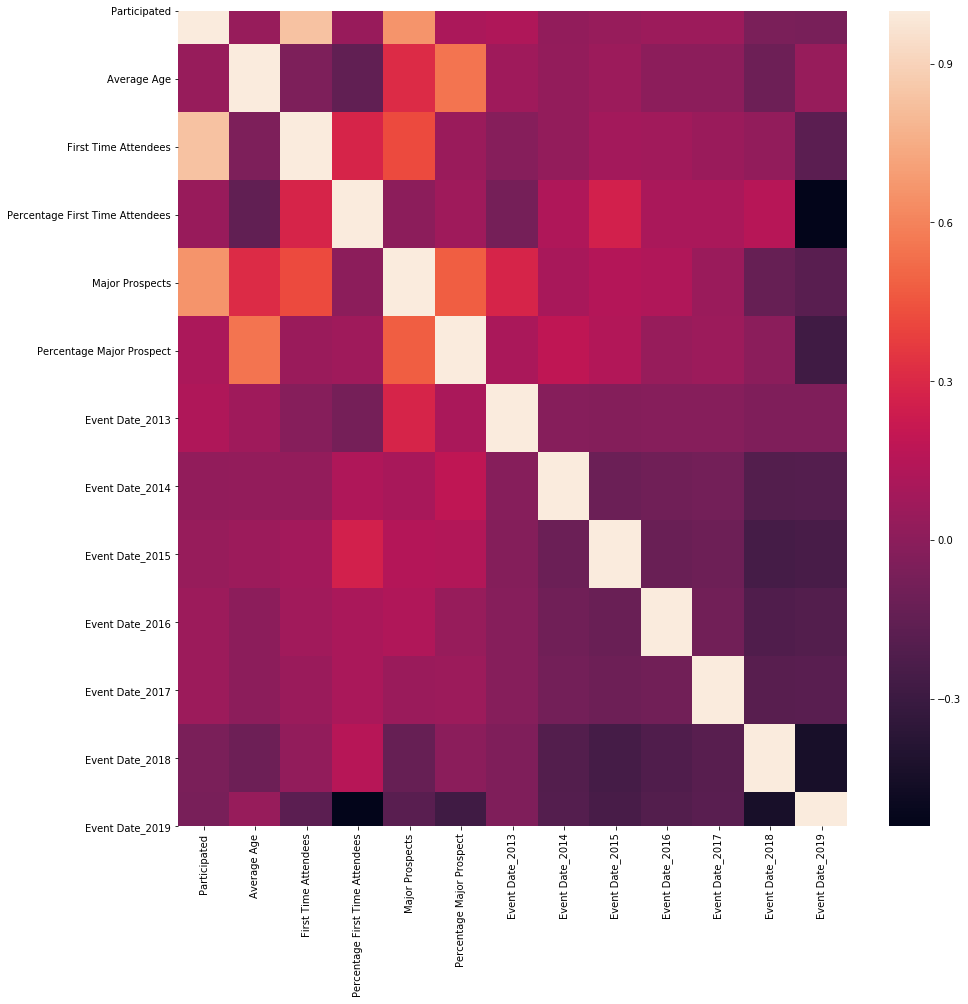

In [ ]:
#correlation plot
fig = plt.figure(figsize = (15,15))
sns.heatmap(df_reg2.corr())
plt.show()

From here the steps are same as above

In [ ]:
#dataframe of dependent and indepent variables
y2=df_reg2['Percentage First Time Attendees']               #dependent variable
x2=df_reg2.drop('Percentage First Time Attendees',axis=1)   #independent variables

In [ ]:
#splitting of train and test
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x2,y2, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 12)
(187, 12)
(187,)


In [ ]:
#fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)

In [ ]:
#prediction using linear regression model
y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 2 using Linear Regression:',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 2 using Linear Regression:',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 2 using Linear Regression: 0.45182808454462065
R Score of Test Data for Model 2 using Linear Regression: 0.2900127986267059


In [ ]:
print('MSE of Train Data for Model 2 using Linear Regression:',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 2 using Linear Regression:',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 2 using Linear Regression: 0.03396884888949738
MSE of Test Data for Model 2 using Linear Regression: 0.03519134890545831


In [ ]:
#intercept on the y-axis
model.intercept_

0.44976690559969945

In [ ]:
#Coefficients of the independent variables
list(zip(x2.columns,model.coef_))

[('Participated', -0.0020310163157162948),
 ('Average Age', -0.0020777610367983955),
 ('First Time Attendees', 0.00470596025928677),
 ('Major Prospects', 0.0014897891812880363),
 ('Percentage Major Prospect', -0.11632172326562165),
 ('Event Date_2013', 0.06983866153929855),
 ('Event Date_2014', 0.049390037400340044),
 ('Event Date_2015', 0.09572840327203119),
 ('Event Date_2016', 0.006908622996757568),
 ('Event Date_2017', 0.042386170131318304),
 ('Event Date_2018', -0.03130946654360236),
 ('Event Date_2019', -0.2329424287961436)]

In [ ]:
#regression report
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x2)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Percentage First Time Attendees   R-squared:                       0.434
Model:                                         OLS   Adj. R-squared:                  0.423
Method:                              Least Squares   F-statistic:                     42.47
Date:                             Fri, 10 Dec 2021   Prob (F-statistic):           3.40e-68
Time:                                     18:06:35   Log-Likelihood:                 176.57
No. Observations:                              622   AIC:                            -329.1
Df Residuals:                                  610   BIC:                            -275.9
Df Model:                                       11                                         
Covariance Type:                         nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3696      0.034     10.966      0.000       0.303       0.436
Participated                 -0.0012      0.000     -6.088      0.000      -0.002      -0.001
Average Age                  -0.0025      0.001     -2.606      0.009      -0.004      -0.001
First Time Attendees          0.0034      0.000      9.299      0.000       0.003       0.004
Major Prospects              -0.0002      0.001     -0.262      0.793      -0.002       0.002
Percentage Major Prospect     0.0021      0.080      0.026      0.979      -0.155       0.159
Event Date_2013               0.0190      0.099      0.192      0.848      -0.175       0.213
Event Date_2014               0.1102      0.027      4.085      0.000       0.057       0.163
Event Date_2015               0.1658      0.024      6.905      0.000       0.119       0.213
Event Date_2016               0.0820      0.026      3.141      0.002       0.031       0.133
Event Date_2017               0.1039      0.029      3.621      0.000       0.048       0.160
Event Date_2018               0.0498      0.020      2.450      0.015       0.010       0.090
Event Date_2019              -0.1610      0.022     -7.363      0.000      -0.204      -0.118
==============================================================================
Omnibus:                       74.517   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.359
Skew:                           0.720   Prob(JB):                     1.22e-31
Kurtosis:                       4.850   Cond. No.                     5.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Linear Regression Model 3

In [ ]:
#dropping all columns except numerical columns
df_reg3=df.drop(['Event Name','Activity Code','Location Code','Group Code','Activity Description','Location Description',
                 'Group Description','Event Date'],axis=1)
df_reg3.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,63,52,5,0.079365,12,0.190476
1,7,56,1,0.142857,0,0.000000
2,28,45,2,0.071429,2,0.071429
3,3,34,0,0.000000,0,0.000000
4,22,38,3,0.136364,0,0.000000


In [ ]:
df_reg3.corr()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
Participated,1.000000,0.037616,0.835996,0.047840,0.658973,0.113415
Average Age,0.037616,1.000000,-0.048204,-0.152633,0.308342,0.549320
First Time Attendees,0.835996,-0.048204,1.000000,0.281961,0.420884,0.051069
Percentage First Time Attendees,0.047840,-0.152633,0.281961,1.000000,0.000751,0.067701
Major Prospects,0.658973,0.308342,0.420884,0.000751,1.000000,0.481370
Percentage Major Prospect,0.113415,0.549320,0.051069,0.067701,0.481370,1.000000


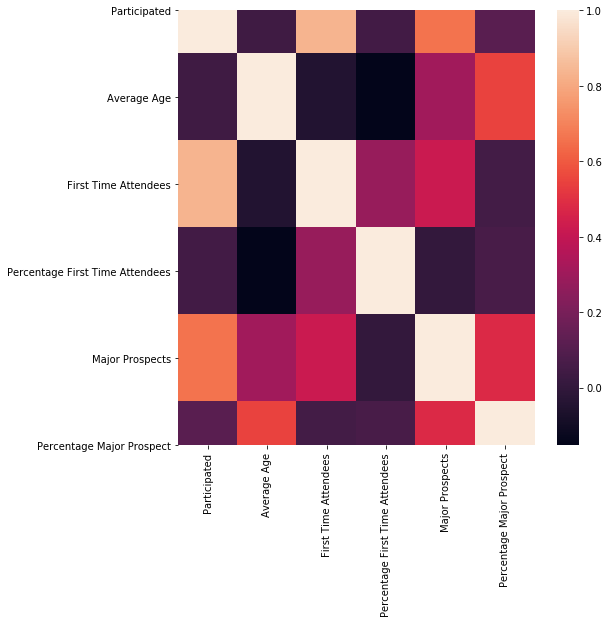

In [ ]:
#correlation heatmap
fig = plt.figure(figsize = (8,8))
sns.heatmap(df_reg3.corr())
plt.show()

In [ ]:
#dataframe of dependent and indepent variables
y3=df_reg3['Percentage First Time Attendees']             #dependent variables
x3=df_reg3.drop('Percentage First Time Attendees',axis=1) #independent variables

In [ ]:
#splitting of train and test
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x3,y3, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 5)
(187, 5)
(187,)


In [ ]:
#fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)


In [ ]:
#prediction using linear regression model
y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 3 using Linear Regression:',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 3 using Linear Regression:',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 3 using Linear Regression: 0.2723571978418382
R Score of Test Data for Model 3 using Linear Regression: -4.7691622484080654e-05


In [ ]:
#MSE of the model
print('MSE of Train Data for Model 3 using Linear Regression:',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 3 using Linear Regression:',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 3 using Linear Regression: 0.04509021293348801
MSE of Test Data for Model 3 using Linear Regression: 0.049568537531258075


In [ ]:
#intercept on the y-axis
model.intercept_

0.4717201724778469

In [ ]:
#coefficient of the independent variables
list(zip(x3.columns,model.coef_))

[('Participated', -0.0030007902774258624),
 ('Average Age', -0.004802312749977791),
 ('First Time Attendees', 0.006558040642017519),
 ('Major Prospects', 0.004222509921137776),
 ('Percentage Major Prospect', 0.22111765788317947)]

In [ ]:
#regression report
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x3)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Percentage First Time Attendees   R-squared:                       0.242
Model:                                         OLS   Adj. R-squared:                  0.235
Method:                              Least Squares   F-statistic:                     39.25
Date:                             Fri, 10 Dec 2021   Prob (F-statistic):           5.04e-35
Time:                                     18:07:37   Log-Likelihood:                 85.727
No. Observations:                              622   AIC:                            -159.5
Df Residuals:                                  616   BIC:                            -132.9
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4670      0.040     11.688      0.000       0.389       0.545
Participated                 -0.0019      0.000     -8.670      0.000      -0.002      -0.001
Average Age                  -0.0054      0.001     -5.075      0.000      -0.007      -0.003
First Time Attendees          0.0049      0.000     12.095      0.000       0.004       0.006
Major Prospects               0.0021      0.001      2.067      0.039       0.000       0.004
Percentage Major Prospect     0.3103      0.087      3.550      0.000       0.139       0.482
==============================================================================
Omnibus:                       68.632   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.514
Skew:                           0.771   Prob(JB):                     9.05e-23
Kurtosis:                       4.241   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

More often than not SLR is not very successful in explaing the way of behaviour of the target model.In such cases we try to use non linear models to explain the behaviour

We have applied 2 of the many non Linear Models.We have applied KNN Regressor and Random Forest Regressor

### KNN Regressoion

KNN Regression on Model 1

In [ ]:
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
#one hot encoding on Location Code,Group Code,Event Date
df_knn1=pd.get_dummies(df,columns=['Location Code','Group Code','Event Date'])

In [ ]:
#dropping of other categorical columns
df_knn1.drop(['Event Name','Activity Code','Activity Description','Location Description','Group Description'],axis=1,inplace=True)

In [ ]:
df_knn1.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Location Code_P9NA,Location Code_PDAN,Location Code_PDBA,Location Code_PDBR,...,Group Code_PUU,Group Code_PUZ,Group Code_PVW,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#dataframe of dependent and indepent variables
y1=df_knn1['Percentage First Time Attendees'] #dependent variable
x1=df_knn1.drop('Percentage First Time Attendees',axis=1) #independent variables

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x1,y1, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 106)
(187, 106)
(187,)


In [ ]:
#fitting the model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
#prediction using KNN regression model
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 1(KNN Regressor):',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 1(KNN Regressor):',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 1(KNN Regressor): 0.8701365685375964
R Score of Test Data for Model 1(KNN Regressor): 0.8578500299925484


In [ ]:
#MSE Value
print('MSE of Train Data for Model 1(KNN Regressor)',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 1(KNN Regressor):',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 1(KNN Regressor) 0.008047313543878679
MSE of Test Data for Model 1(KNN Regressor): 0.007045830096312535


We further optimize our Model to find best parameters using Randomized Searh Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

knr=KNeighborsRegressor()

params={
    'n_neighbors':randint(50,100),
     'weights':['uniform','distance'],
     'leaf_size':randint(50,100),
     'p':[1,2]
     
   }

rsearch=RandomizedSearchCV(knr,params,cv=15,scoring='r2',n_jobs=-1, 
                           random_state=42,n_iter=10)
rsearch.fit(x1,y1)
rsearch.best_params_

{'leaf_size': 57, 'n_neighbors': 70, 'p': 1, 'weights': 'distance'}

In [ ]:
#best score obtained
print(rsearch.best_score_)

-0.0595677709274855


In [ ]:
#best parameters found using Randomized search CV
print(rsearch.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=57, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=1,
                    weights='distance')


In [ ]:
#best parameters fitted to the KNN Regressor
knr=KNeighborsRegressor(**rsearch.best_params_)

In [ ]:
#fitting the model with best parameters
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=57, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=1,
                    weights='distance')

In [ ]:
#prediction of the train and test
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 1(Optimized KNN Regressor):',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 1(Optimized KNN Regressor):',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 1(Optimized KNN Regressor): 1.0
R Score of Test Data for Model 1(Optimized KNN Regressor): 0.5656759448493528


In [ ]:
#MSE Value
print('MSE of Train Data for Model 1(Optimized KNN Regressor)',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 1(Optimized KNN Regressor):',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 1(Optimized KNN Regressor) 0.0
MSE of Test Data for Model 1(Optimized KNN Regressor): 0.021527781533633234


KNN Regression on Model 2

In [ ]:
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
#one hot encoding on Event Date
df_knn2=pd.get_dummies(df,columns=['Event Date'])
df_knn2.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,63,52,5,0.079365,12,0.190476,0,0,0,0,0,0,1
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,7,56,1,0.142857,0,0.000000,0,0,0,0,0,0,1
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,28,45,2,0.071429,2,0.071429,0,0,0,0,0,0,1
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,3,34,0,0.000000,0,0.000000,0,0,0,0,0,0,1
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,22,38,3,0.136364,0,0.000000,0,0,0,0,0,0,1


In [ ]:
#rdropping the categorical columns
df_knn2.drop(['Event Name','Activity Code','Location Code','Group Code','Activity Description',
              'Location Description','Group Description'],axis=1,inplace=True)
df_knn2.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,0,0,1


In [ ]:
#dataframe of dependent and indepent variables
yknn2=df_knn2['Percentage First Time Attendees']           #dependent variable
xknn2=df_knn2.drop('Percentage First Time Attendees',axis=1) #independent variables

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(xknn2,yknn2, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 12)
(187, 12)
(187,)


In [ ]:
#fitting the model
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
#prediction using KNN regression model
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 2(KNN Regressor):',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 2(KNN Regressor):',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 2(KNN Regressor): 0.8732630937062082
R Score of Test Data for Model 2(KNN Regressor): 0.8605526335660996


In [ ]:
#MSE Value
print('MSE of Train Data for Model 2(KNN Regressor)',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 2(KNN Regressor):',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 2(KNN Regressor) 0.00785357056287688
MSE of Test Data for Model 2(KNN Regressor): 0.00691187237830577


In [ ]:
#optimization using Randomized search Cross validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

knr=KNeighborsRegressor()

params={
    'n_neighbors':randint(50,100),
     'weights':['uniform','distance'],
     'leaf_size':randint(50,100),
     'p':[1,2]
     
   }

rsearch=RandomizedSearchCV(knr,params,cv=15,scoring='r2',n_jobs=-1, 
                           random_state=42,n_iter=10)
rsearch.fit(xknn2,yknn2)
rsearch.best_params_

{'leaf_size': 57, 'n_neighbors': 70, 'p': 1, 'weights': 'distance'}

In [ ]:
#best score obtained
print(rsearch.best_score_)

0.03683839272667728


In [ ]:
#best parameters found using Randomized search CV
print(rsearch.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=57, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=1,
                    weights='distance')


In [ ]:
#best parameters fitted to the KNN Regressor
knr=KNeighborsRegressor(**rsearch.best_params_)

In [ ]:
#fitting the model with best parameters
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=57, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=1,
                    weights='distance')

In [ ]:
#prediction of the train and test
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 2(Optimized KNN Regressor):',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 2(Optimized KNN Regressor):',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 2(Optimized KNN Regressor): 1.0
R Score of Test Data for Model 2(Optimized KNN Regressor): 0.5952956634248312


In [ ]:
#MSE Value
print('MSE of Train Data for Model 2(Optimized KNN Regressor)',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 2(Optimized KNN Regressor):',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 2(Optimized KNN Regressor) 0.0
MSE of Test Data for Model 2(Optimized KNN Regressor): 0.02005964541955264


KNN Regression on  Model 3

In [ ]:
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
#dropping of categorical columns
df_knn3=df.drop(['Event Name','Activity Code','Location Code','Group Code','Activity Description','Location Description',
                 'Group Description','Event Date'],axis=1)
df_knn3.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,63,52,5,0.079365,12,0.190476
1,7,56,1,0.142857,0,0.000000
2,28,45,2,0.071429,2,0.071429
3,3,34,0,0.000000,0,0.000000
4,22,38,3,0.136364,0,0.000000


In [ ]:
#dataframe of dependent and indepent variables
y3=df_knn3['Percentage First Time Attendees']             #dependent variable
x3=df_knn3.drop('Percentage First Time Attendees',axis=1) #independent variables

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x3,y3, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 5)
(187, 5)
(187,)


In [ ]:
#fitting the model
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
#prediction using KNN regression model
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 3(KNN Regressor):',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 3(KNN Regressor):',r2_score(y_test,y_test_pred))

R Score of Train Data for Model 3(KNN Regressor): 0.8717456954122178
R Score of Test Data for Model 3(KNN Regressor): 0.8523298767563428


In [ ]:
#MSE Value
print('MSE of Train Data for Model 1(KNN Regressor)',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 1(KNN Regressor):',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 1(KNN Regressor) 0.007947599957489199
MSE of Test Data for Model 1(KNN Regressor): 0.007319442970137807


In [ ]:
#optimization using Randomized Cross Validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

knr=KNeighborsRegressor()

params={
    'n_neighbors':randint(50,100),
     'weights':['uniform','distance'],
     'leaf_size':randint(50,100),
     'p':[1,2]
     
   }

rsearch=RandomizedSearchCV(knr,params,cv=15,scoring='r2',n_jobs=-1, 
                           random_state=42,n_iter=10)
rsearch.fit(x3,y3)
rsearch.best_params_

{'leaf_size': 57, 'n_neighbors': 70, 'p': 1, 'weights': 'distance'}

In [ ]:
#best score obtained
print(rsearch.best_score_)

-0.031801402232159104


In [ ]:
#best parameters found using Randomized search CV
print(rsearch.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=57, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=1,
                    weights='distance')


In [ ]:
#best parameters fitted to the KNN Regressor
knr=KNeighborsRegressor(**rsearch.best_params_)

In [ ]:
#fitting the model with best parameters
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=57, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=70, p=1,
                    weights='distance')

In [ ]:
#prediction of the train and test
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [ ]:
#R-square value
print('R Score of Train Data for Model 1(Optimized KNN Regressor):',r2_score(y_train,y_train_pred))
print('R Score of Test Data for Model 1(Optimized KNN Regressor):',r2_score(y_test,y_test_pred))


R Score of Train Data for Model 1(Optimized KNN Regressor): 1.0
R Score of Test Data for Model 1(Optimized KNN Regressor): 0.5959252035607601


In [ ]:
#MSE Value
print('MSE of Train Data for Model 1(Optimized KNN Regressor)',mean_squared_error(y_train_pred,y_train))
print('MSE of Test Data for Model 1(Optimized KNN Regressor):',mean_squared_error(y_test_pred,y_test))

MSE of Train Data for Model 1(Optimized KNN Regressor) 0.0
MSE of Test Data for Model 1(Optimized KNN Regressor): 0.020028441523861826


## Random Forest Regressor

Random Forest Reggression on Model 1

In [ ]:
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
#one hot encoding on Location Code,Group Code,Event Date
df_rf1=pd.get_dummies(df,columns=['Location Code','Group Code','Event Date'])

In [ ]:
#dropping of other categorical columns
df_rf1.drop(['Event Name','Activity Code','Activity Description',
              'Location Description','Group Description'],axis=1,inplace=True)
df_rf1.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Location Code_P9NA,Location Code_PDAN,Location Code_PDBA,Location Code_PDBR,...,Group Code_PUU,Group Code_PUZ,Group Code_PVW,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_rf1.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Location Code_P9NA,Location Code_PDAN,Location Code_PDBA,Location Code_PDBR,...,Group Code_PUU,Group Code_PUZ,Group Code_PVW,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#dataframe of dependent and indepent variables
y1=df_rf1['Percentage First Time Attendees']#dependent variable
x1=df_rf1.drop('Percentage First Time Attendees',axis=1) #independent variables


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x1,y1, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 106)
(187, 106)
(187,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#fitting the model
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [ ]:
#prediction using Random Forest regression model
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [ ]:
rf_train_score=rf.score(x_train,y_train)
rf_test_score=rf.score(x_test, y_test)

In [ ]:
#R-square value

print("Random Forest regressor train score :", rf_train_score)
print("Random Forest regression test score :", rf_test_score)

Random Forest regressor train score : 0.9803911673110032
Random Forest regression test score : 0.9192186640152433


In [ ]:
#MSE Value
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.001215110544214279
MSE Of test: 0.004004021726292994


We further optimize our Model to find best parameters using Randomized Searh Cross Validation

In [ ]:

import scipy.stats as stats
rfr=RandomForestRegressor()



random=RandomizedSearchCV(rfr,{'max_depth':range(1,16),
                         'min_samples_split':range(2,16),
                         'min_samples_leaf':range(1,16),
                         'max_features':['auto','sqrt','log2']},cv=5)
random.fit(x1,y1)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [ ]:
#best parameters found using Randomized search CV
random.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [ ]:
#fitting the model with best parameters
rfr=RandomForestRegressor(**random.best_params_)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
#prediction of the train and test
y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)

In [ ]:
#R-square value
rf_train_score=rfr.score(x_train,y_train)
rf_test_score=rfr.score(x_test, y_test)

print("Random Forest regressor(Optimized) train score :", rf_train_score)
print("Random Forest regression(Optimized) test score :", rf_test_score)

Random Forest regressor(Optimized) train score : 0.9430476295091235
Random Forest regression(Optimized) test score : 0.9216335039516499


In [ ]:
#MSE Value
print('MSE Of train(optimized):',mean_squared_error(y_train,y_pred_train))
print('MSE Of test(optimized):',mean_squared_error(y_test,y_pred_test))

MSE Of train(optimized): 0.0035291966125191435
MSE Of test(optimized): 0.0038843273506922117


Random Forest Regression on Model 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
#one hot encoding on Location Code,Group Code,Event Date
df_rf2=pd.get_dummies(df,columns=['Event Date'])
df_rf2.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,63,52,5,0.079365,12,0.190476,0,0,0,0,0,0,1
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,7,56,1,0.142857,0,0.000000,0,0,0,0,0,0,1
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,28,45,2,0.071429,2,0.071429,0,0,0,0,0,0,1
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,3,34,0,0.000000,0,0.000000,0,0,0,0,0,0,1
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,22,38,3,0.136364,0,0.000000,0,0,0,0,0,0,1


In [ ]:
#dropping of other categorical columns
df_rf2.drop(['Event Name','Activity Code','Location Code','Group Code','Activity Description',
              'Location Description','Group Description'],axis=1,inplace=True)
df_rf2.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Event Date_2013,Event Date_2014,Event Date_2015,Event Date_2016,Event Date_2017,Event Date_2018,Event Date_2019
0,63,52,5,0.079365,12,0.190476,0,0,0,0,0,0,1
1,7,56,1,0.142857,0,0.000000,0,0,0,0,0,0,1
2,28,45,2,0.071429,2,0.071429,0,0,0,0,0,0,1
3,3,34,0,0.000000,0,0.000000,0,0,0,0,0,0,1
4,22,38,3,0.136364,0,0.000000,0,0,0,0,0,0,1


In [ ]:
#dataframe of dependent and indepent variables
y2=df_rf2['Percentage First Time Attendees']#dependent variable
x2=df_rf2.drop('Percentage First Time Attendees',axis=1) #independent variables

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x2,y2, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 12)
(187, 12)
(187,)


In [ ]:
#fitting the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [ ]:
#prediction using Random Forest regression model
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [ ]:
#R-square value

print("Random Forest regressor train score :", rf_train_score)
print("Random Forest regression test score :", rf_test_score)

Random Forest regressor train score : 0.9430476295091235
Random Forest regression test score : 0.9216335039516499


In [ ]:
#MSE Value
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.0009164187191376933
MSE Of test: 0.0029731052246393407


In [ ]:
#randomized search CV
import scipy.stats as stats
rfr=RandomForestRegressor()



random=RandomizedSearchCV(rfr,{'max_depth':range(1,16),
                         'min_samples_split':range(2,16),
                         'min_samples_leaf':range(1,16),
                         'max_features':['auto','sqrt','log2']},cv=5)
random.fit(x2,y2)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [ ]:
#best parameters found using Randomized search CV
random.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 14}

In [ ]:
#fitting the model with best parameters
rfr=RandomForestRegressor(**random.best_params_)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
#prediction of the train and test
y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)

In [ ]:
#R-square score
rf_train_score=rfr.score(x_train,y_train)
rf_test_score=rfr.score(x_test, y_test)

print("Random Forest regressor train score :", rf_train_score)
print("Random Forest regression test score :", rf_test_score)

Random Forest regressor train score : 0.9833758345684207
Random Forest regression test score : 0.9186484847522153


In [ ]:
#MSE Value
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.0010301581448042788
MSE Of test: 0.0040322833306501715


Random Forest Regressor on Model 3

In [ ]:
##dropping of categorical columns
df_rf3=df.drop(['Event Name','Activity Code','Location Code','Group Code','Activity Description','Location Description',
                 'Group Description','Event Date'],axis=1)
df_rf3.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,63,52,5,0.079365,12,0.190476
1,7,56,1,0.142857,0,0.000000
2,28,45,2,0.071429,2,0.071429
3,3,34,0,0.000000,0,0.000000
4,22,38,3,0.136364,0,0.000000


In [ ]:
#dataframe of dependent and indepent variables
y3=df_rf3['Percentage First Time Attendees']#dependent variable
x3=df_rf3.drop('Percentage First Time Attendees',axis=1)#independent variables

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x3,y3, test_size = 0.30, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 5)
(187, 5)
(187,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#fitting the model
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [ ]:
#prediction using Random Forest regression model
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [ ]:
#R-square value
rf_train_score=rf.score(x_train,y_train)
rf_test_score=rf.score(x_test, y_test)

print("Random Forest regressor train score :", rf_train_score)
print("Random Forest regression test score :", rf_test_score)

Random Forest regressor train score : 0.984199412548221
Random Forest regression test score : 0.8820902564091198


In [ ]:
#MSE Value
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.0009791230677494657
MSE Of test: 0.005844334824675436


In [ ]:
#optimization using Randomized search CV
import scipy.stats as stats
rfr=RandomForestRegressor()



random=RandomizedSearchCV(rfr,{'max_depth':range(1,16),
                         'min_samples_split':range(2,16),
                         'min_samples_leaf':range(1,16),
                         'max_features':['auto','sqrt','log2']},cv=5)
random.fit(x3,y3)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [ ]:
#best parameters found using Randomized search CV
random.best_params_

{'min_samples_split': 11,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 11}

In [ ]:
#fitting the model with best parameters
rfr=RandomForestRegressor(**random.best_params_)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=11,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
#prediction of the train and test
y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)

In [ ]:
#R-square value
rf_train_score=rfr.score(x_train,y_train)
rf_test_score=rfr.score(x_test, y_test)

print("Random Forest regressor train score(optimized) :", rf_train_score)
print("Random Forest regression test score(optimized) :", rf_test_score)

Random Forest regressor train score(optimized) : 0.9558851017668071
Random Forest regression test score(optimized) : 0.8642026383962461


In [ ]:
#MSE Value
print('MSE Of train(optimized):',mean_squared_error(y_train,y_pred_train))
print('MSE Of test(optimized):',mean_squared_error(y_test,y_pred_test))

MSE Of train(optimized): 0.0027336904164709267
MSE Of test(optimized): 0.0067309556051078296


Non-Linear Models help us to predict the Percentage of First Time attendees in the most effective manner.

Looking at all the parameters we conclude that Model 2 is best suited for our analysis.

Also Random Forest Regressor is the most efficient regressor for our model.


The Highest R-Square Obtained for Test:0.9216

Model                                 :Model 2

Regressor                             :Random Forest Regressor(Normal)

## **Clustering**

Clustering is the process of dividing the data points into a number of groups/clusters such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.It is generally done to label unlabelled data.

For our case, we will check if the years are uniquely distinguishable or not


In [ ]:
#reading the data
df = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None), ignore_index=True)
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000


In [ ]:
#extarcting just the year from the event dates
df['Event Date']=pd.DatetimeIndex(df['Event Date']).year

In [ ]:
#dropping categorical columns
df_clus=df.drop(['Event Name','Activity Code','Activity Description','Location Code','Location Description',
                 'Group Code','Group Description'],axis=1)

In [ ]:
df_clus.head()

,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,2019,63,52,5,0.079365,12,0.190476
1,2019,7,56,1,0.142857,0,0.000000
2,2019,28,45,2,0.071429,2,0.071429
3,2019,3,34,0,0.000000,0,0.000000
4,2019,22,38,3,0.136364,0,0.000000


In [ ]:
#storing target column as a series and other variables in another dataframe
x=df_clus.drop('Event Date',axis=1)
y=df_clus['Event Date']

In [ ]:
#scaling the target value 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [ ]:
#importing K-Means clustering
from sklearn.cluster import KMeans
kmeans=KMeans()

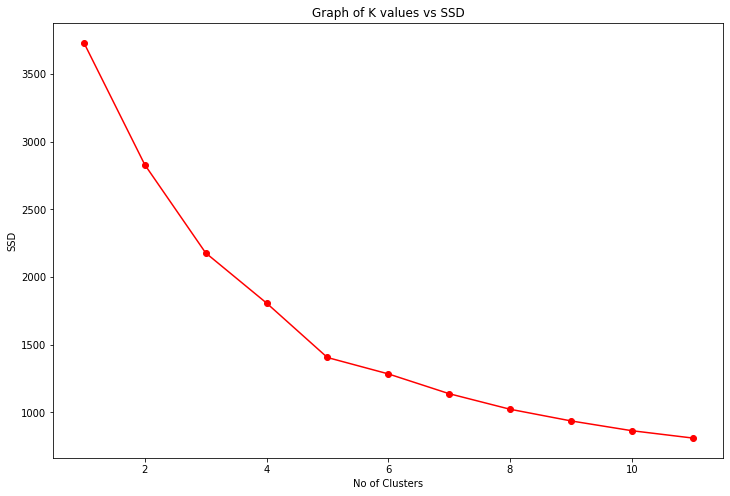

In [ ]:
#scree plot to help us determine the no.of clusters we should take
ssd=[]
plt.figure(figsize=(12,8))

for k in range(1,12):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(range(1,12),ssd,color='red',marker='o')
plt.title('Graph of K values vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('SSD')
plt.show()

In [ ]:
#error values of the terms
error=pd.DataFrame(ssd,range(1,12),columns=['Sum of Squared Distances'])
error

,Sum of Squared Distances
1,3732.000000
2,2830.830776
3,2179.210375
4,1808.842058
5,1406.249639
6,1285.225417
7,1138.888308
8,1024.048173
9,937.939255
10,865.546570


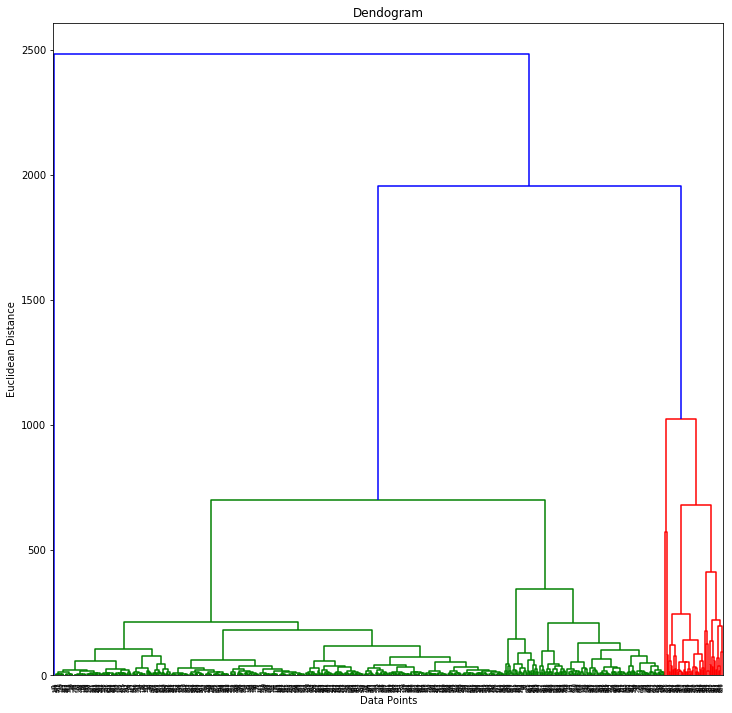

In [ ]:
#dendogram-help us determine the no.of clusters we should take

from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
plt.figure(figsize=[12,12])
merg=linkage(x,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#from the scree plot and dendrogram taking 5 clusters is good
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#centroid values of each of the variables we used to cluster
centroids=kmeans.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=list(x))
centroid_df.head()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,-0.186530,-0.147590,-0.260785,-0.689878,-0.316598,-0.427689
1,11.797128,-0.885319,14.390814,1.398586,3.013991,-0.555396
2,-0.051882,1.166757,-0.048059,0.109511,0.290724,1.400938
3,-0.123024,-0.672685,0.133349,1.170685,-0.313262,-0.423141
4,1.874620,0.710310,1.089115,0.097786,3.410370,1.241272


In [ ]:
#adding the cluster labels to the appropriate row
df['Cluster']=kmeans.labels_
df.head()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Cluster
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019,63,52,5,0.079365,12,0.190476,2
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019,7,56,1,0.142857,0,0.000000,0
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019,28,45,2,0.071429,2,0.071429,0
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019,3,34,0,0.000000,0,0.000000,0
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019,22,38,3,0.136364,0,0.000000,0


In [ ]:
#comaprison between the original data class and predicted data class
print('Original data classes:')
print(df['Event Date'].value_counts())
print('-'*30)
print('Predicted data class:')
print(df['Cluster'].value_counts())

Original data classes:
2018    196
2019    184
2015     81
2016     59
2014     54
2017     45
2013      3
Name: Event Date, dtype: int64
------------------------------
Predicted data class:
0    307
3    165
2    116
4     32
1      2
Name: Cluster, dtype: int64


NO. of Years = 7

No. of Clusters formed = 5

There are many Event Year that have similar data points and hence we could not divide the data into 7 clusters which would have been ideal. 

This suggest that inconsistency in data.

